In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - acc: 0.5835 - loss: 0.6612 - val_acc: 0.8022 - val_loss: 0.4396
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - acc: 0.8141 - loss: 0.4302 - val_acc: 0.8312 - val_loss: 0.3833
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - acc: 0.8658 - loss: 0.3303 - val_acc: 0.8214 - val_loss: 0.3841
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - acc: 0.8903 - loss: 0.2823 - val_acc: 0.8674 - val_loss: 0.3467
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - acc: 0.9136 - loss: 0.2307 - val_acc: 0.8652 - val_loss: 0.3468
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - acc: 0.9205 - loss: 0.2123 - val_acc: 0.8640 - val_loss: 0.3849
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - acc: 0.9420 - loss: 0.1581 - val_acc: 0.8268 - val_loss: 0.4322
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - acc: 0.9617 - loss: 0.1118 - val_acc: 0.8180 -

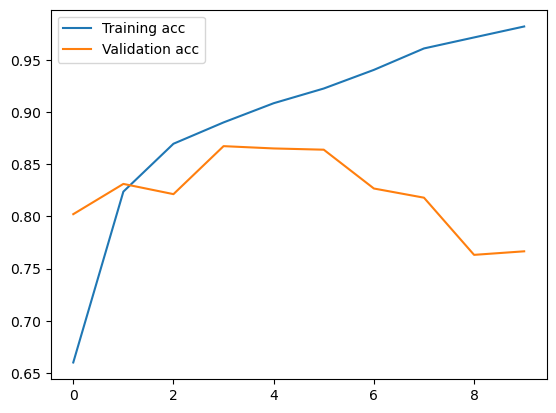

(<matplotlib.legend.Legend at 0x237eb1c9100>, None)

In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

# Load and preprocess data
max_features, maxlen = 10000, 500
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train, input_test = sequence.pad_sequences(input_train, maxlen=maxlen), sequence.pad_sequences(input_test, maxlen=maxlen)

# Define, compile, and train model
model = Sequential([Embedding(max_features, 32), SimpleRNN(32), Dense(1, activation='sigmoid')])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Plot accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label='Training acc')
plt.plot(history.history['val_acc'], label='Validation acc')
plt.legend(), plt.show()
